In [1]:
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 11.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
!pip install kmapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.6 MB/s eta 0:00:00


In [3]:
import kmapper as km
from kmapper.jupyter import display
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df1 = pd.read_csv('https://raw.githubusercontent.com/kevingonzalezd/csv/main/wine-clustering.csv')
df1.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [70]:
df1 = pd.read_csv('https://raw.githubusercontent.com/kevingonzalezd/csv/main/wine-clustering.csv')

var1='Hue'
var2='OD280'
df = pd.concat([df1[var1] , df1[var2]], axis=1)

df

,Hue,OD280
0,1.04,3.92
1,1.05,3.40
2,1.03,3.17
3,0.86,3.45
4,1.04,2.93
...,...,...
173,0.64,1.74
174,0.70,1.56
175,0.59,1.56
176,0.60,1.62


Veamos la información básica de la base de datos de aquellos valores no categóricos.

In [71]:
data = df.to_numpy()
data

array([[1.04 , 3.92 ],
       [1.05 , 3.4  ],
       [1.03 , 3.17 ],
       [0.86 , 3.45 ],
       [1.04 , 2.93 ],
       [1.05 , 2.85 ],
       [1.02 , 3.58 ],
       [1.06 , 3.58 ],
       [1.08 , 2.85 ],
       [1.01 , 3.55 ],
       [1.25 , 3.17 ],
       [1.17 , 2.82 ],
       [1.15 , 2.9  ],
       [1.25 , 2.73 ],
       [1.2  , 3.   ],
       [1.28 , 2.88 ],
       [1.07 , 2.65 ],
       [1.13 , 2.57 ],
       [1.23 , 2.82 ],
       [0.96 , 3.36 ],
       [1.09 , 3.71 ],
       [1.03 , 3.52 ],
       [1.11 , 4.   ],
       [1.09 , 3.63 ],
       [1.12 , 3.82 ],
       [1.13 , 3.2  ],
       [0.92 , 3.22 ],
       [1.02 , 2.77 ],
       [1.25 , 3.4  ],
       [1.04 , 3.59 ],
       [1.19 , 2.71 ],
       [1.09 , 2.88 ],
       [1.23 , 2.87 ],
       [1.25 , 3.   ],
       [1.1  , 2.87 ],
       [1.04 , 3.47 ],
       [1.09 , 2.78 ],
       [1.12 , 2.51 ],
       [1.18 , 2.69 ],
       [0.89 , 3.53 ],
       [0.95 , 3.38 ],
       [0.91 , 3.   ],
       [0.88 , 3.56 ],
       [0.8

In [72]:
mean_other_score=(data[:,1])

In [73]:
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(data, projection=[0] )


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (178, 2)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()



In [74]:
covering=km.Cover(n_cubes=4,perc_overlap=0.2)

In [75]:
G = mapper.map(projected_data, data, clusterer=sklearn.cluster.KMeans(n_clusters=4),cover=covering)

Mapping on data shaped (178, 2) using lens shaped (178, 1)

Creating 4 hypercubes.

Created 13 edges and 16 nodes in 0:00:00.017257.


In [76]:
G['meta_data']

{'projection': '[0]',
 'n_cubes': 4,
 'perc_overlap': 0.2,
 'clusterer': 'KMeans(n_clusters=4)',
 'scaler': 'MinMaxScaler()'}

In [77]:
mapper.visualize(G,
                title='Gráfico de clusters',
                #custom_tooltips = performance_data['gender'].to_numpy(),
                color_values = mean_other_score,
                color_function_name = 'Variables',

                node_color_function=np.array(['average','std','sum','max','min']))

km.jupyter.display("level_education_math" + ".html")

Wrote visualization to: mapper_visualization_output.html


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


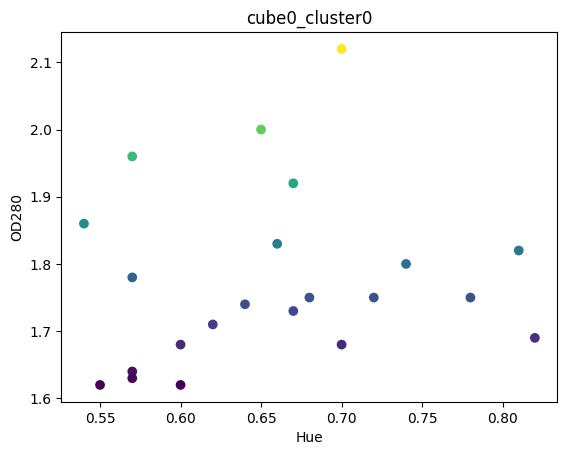

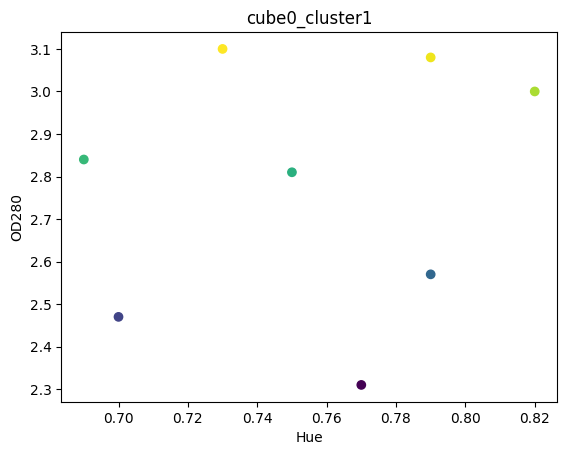

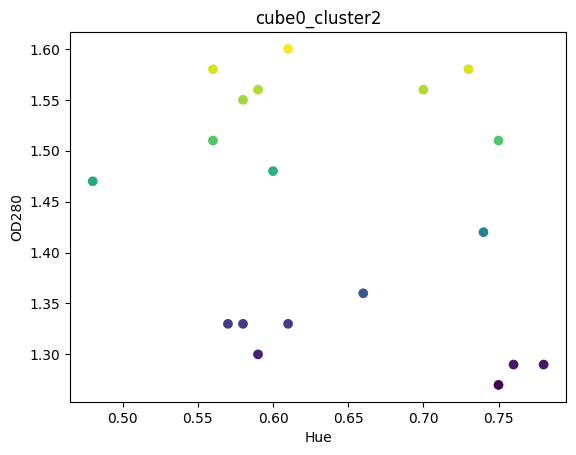

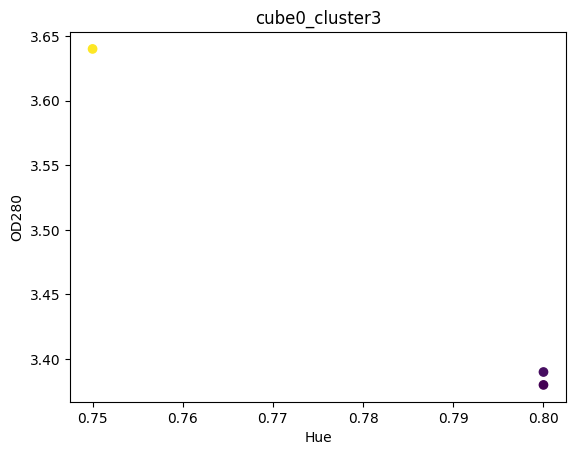

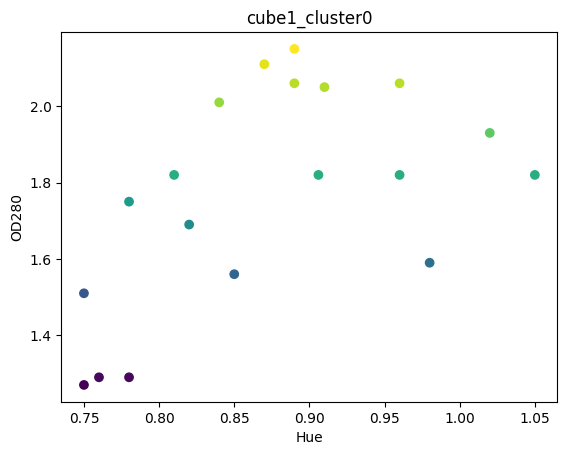

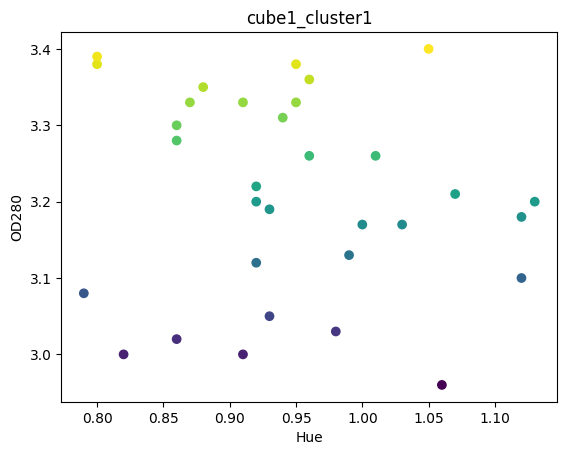

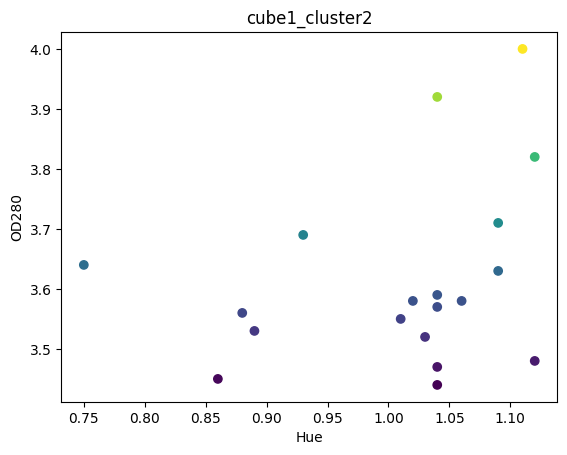

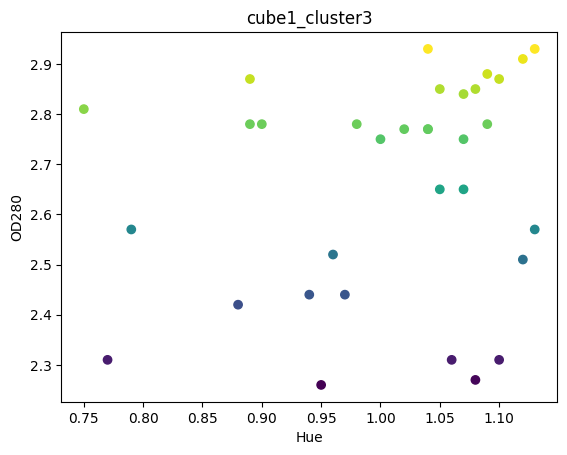

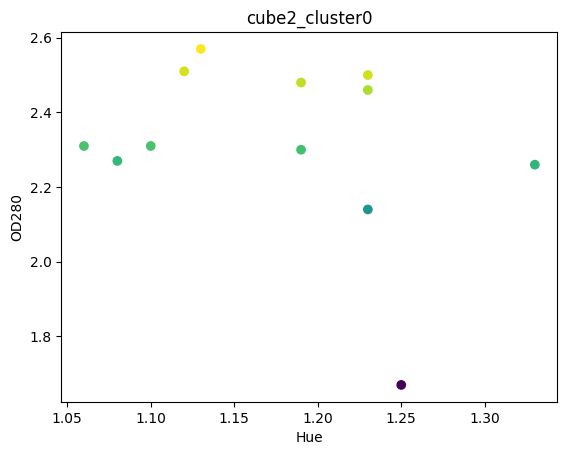

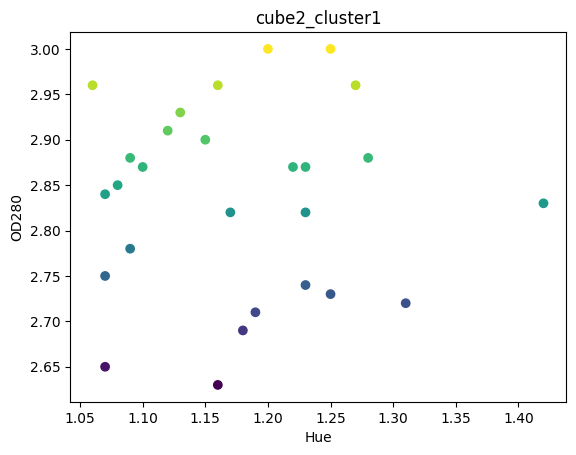

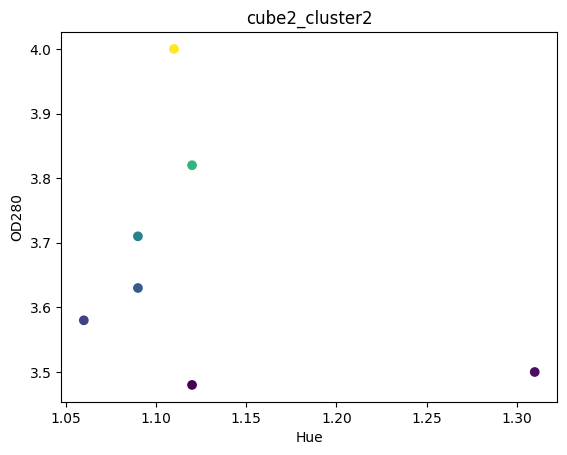

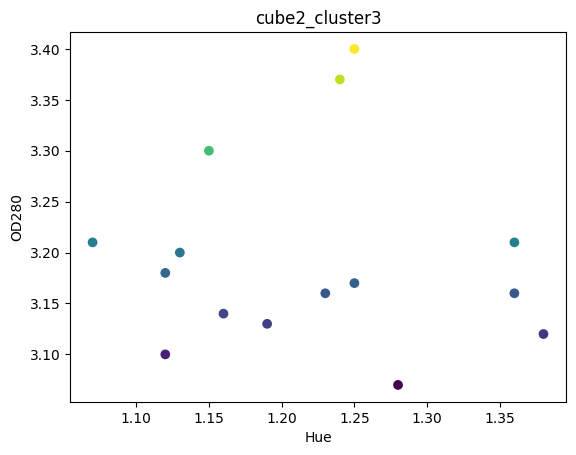

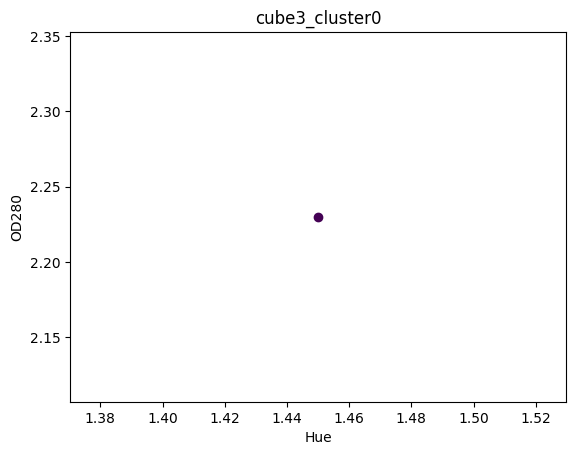

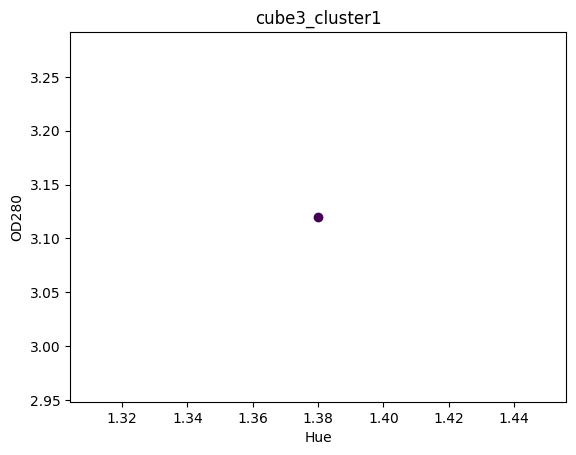

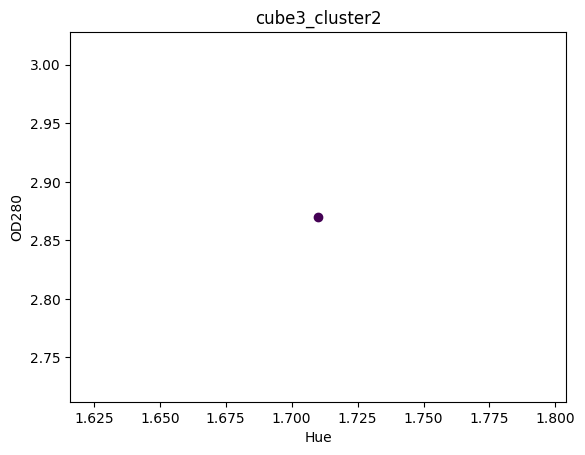

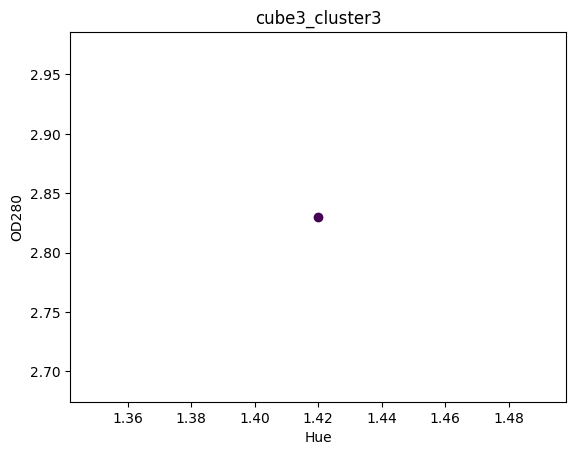

In [78]:
import matplotlib.pyplot as plt

# Obtener la lista de todos los nodos en el grafo G
nodos = list(G['nodes'].keys())

# Iterar sobre todos los nodos
for nodo in nodos:
    mvstwo_cube3c1 = df1.iloc[G['nodes'][nodo], :]
    x = mvstwo_cube3c1[var1]
    y = mean_other_score[G['nodes'][nodo]]

    # Crear el gráfico de dispersión
    scatter = plt.scatter(x=x, y=y, c=y, cmap='viridis')

    # Configurar título y ejes
    plt.title(nodo)
    plt.xlabel(var1)
    plt.ylabel(var2)

    # Mostrar el gráfico
    plt.show()
